## **Feature Scaling**

---



---



In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
x = np.array([-400,-100,0,100,400]).reshape(-1,1)
x

array([[-400],
       [-100],
       [   0],
       [ 100],
       [ 400]])

#### MinMaxScaler 
***(Xi - Xmin)/(Xmax-Xmin)***

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
x_scale = min_max_scaler.fit_transform(x)

In [ ]:
print(x_scale)

[[0.   ]
 [0.375]
 [0.5  ]
 [0.625]
 [1.   ]]


#### StandardScaler & Z-score
***z value - (Xi-Xmean)/Xstd***

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = np.arange(1,10).reshape(3,3)
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

In [ ]:
from scipy import stats
stats.zscore(x)

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

In [ ]:
df = pd.DataFrame({'col1':np.random.normal(0,1,1000),'col2':np.random.normal(-3,5,1000)})

In [ ]:
scaler = StandardScaler()
df_scaled =scaler.fit_transform(df.values)
df_scale = pd.DataFrame(df_scaled, columns=['col1_transformed','col2_transformed']) 

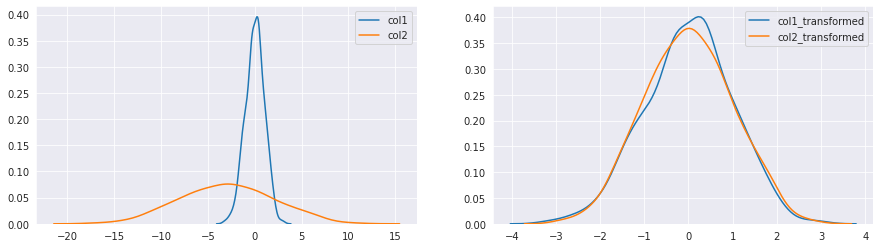

In [ ]:
figure, ax = plt.subplots(1,2,figsize=(15,4))


sns.kdeplot(df['col1'],ax=ax[0])
sns.kdeplot(df['col2'],ax=ax[0])

sns.kdeplot(df_scale['col1_transformed'],ax=ax[1])
sns.kdeplot(df_scale['col2_transformed'],ax=ax[1])
plt.show()

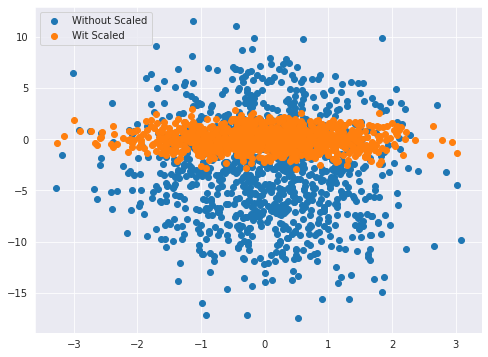

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=df['col1'],y=df['col2'],label='Without Scaled')
plt.scatter(x=df_scale['col1_transformed'],y=df_scale['col2_transformed'],label='Wit Scaled')
plt.legend()

####Binarizer

In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
scale = Binarizer(5) # 1 where no is greater than 5

In [ ]:
x_scaled = scale.fit_transform(x)

In [ ]:
x_scaled

array([[0, 0, 0],
       [0, 0, 1],
       [1, 1, 1]])

####Normalizer

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
nrm = Normalizer()

In [ ]:
x_nrm =  nrm.fit_transform(x)

In [ ]:
x_nrm

array([[0.26726124, 0.53452248, 0.80178373],
       [0.45584231, 0.56980288, 0.68376346],
       [0.50257071, 0.57436653, 0.64616234]])

In [ ]:
1/(np.sqrt((1**2)+(2**2)+(3**2)))

0.2672612419124244

In [ ]:
4/(np.sqrt((4**2)+(5**2)+(6**2)))

0.4558423058385518

In [ ]:
6/(np.sqrt((4**2)+(5**2)+(6**2)))

0.6837634587578276

###***RobustScaler - Scale features using statistics that are robust to outliers***

*Formual for Robust Scaler : (Xi - Q2) / (Q3 - Q1)*

This Scaler removes the median and scales the data according to the quantile range 
(defaults to IQR: Interquartile Range). 
The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature (or each sample, depending on the 
axis argument) by computing the relevant statistics on the samples in the training set. 
Median and interquartile range are then stored to be used on later data using the transform method

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
x = np.array([-500,-100,0,100,900]).reshape(-1,1)
x

array([[-500],
       [-100],
       [   0],
       [ 100],
       [ 900]])

In [ ]:
scaler = RobustScaler()

In [ ]:
x_scaler = scaler.fit_transform(x)

In [ ]:
x_scaler

array([[-2.5],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 4.5]])

In [ ]:
Q1, Q2, Q3 = np.percentile(x,25), np.percentile(x,50), np.percentile(x,75)

In [ ]:
(x-Q2)/(Q3-Q1)

array([[-2.5],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 4.5]])

## All Standardization And Transformation Techniques

####1. Normalization & Standardization
####2. Scaling to Minimum & Maximum Values
####3. Scaling to Median & Quantiles
####4. Guassian Transformation
  1. Logarithmic Transformation
  2. Reciprocal Transformation 
  3. Square Root Transformation
  4. Exponential Transformation
  5. Box Cox Transformation

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stat

In [2]:
df = pd.read_csv('train.csv',usecols=['Survived','Pclass', 'Age','Fare'])

In [ ]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [3]:
df['Age'] = df['Age'].fillna(df.Age.median())

###***1. StandardScaler***

In [ ]:
scaler = StandardScaler()

In [ ]:
# Column wise Standardization

Column wise Standardization

In [ ]:
df_scaled = scaler.fit_transform(df)
pd.DataFrame(df_scaled).head()

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


#### ***2. Min Max Scaling (# CNN) -- Deep learning Technique***
X_scaled = (X - X.min)/(X.max - X.min)

In [ ]:
df['Age'] = df['Age'].astype(np.float64)

In [ ]:
min_max = MinMaxScaler()
pd.DataFrame(min_max.fit_transform(df)).head()

,0,1,2,3
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


#### ***3. Robust Scaler***
It is used to Scale the feature to median and Quantiles

X_scaled = (X - X.median)/IQR   
**IQR = 75th Quantile - 25th Quantile**

In [ ]:
robust_scale = RobustScaler()
pd.DataFrame(robust_scale.fit_transform(df)).head()

,0,1,2,3
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


####***4. Guassian Transformation***

In [17]:
def qqplot(data,features):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.hist(df[features])
  plt.title('Histogram')
  plt.subplot(1,2,2)
  stat.probplot(df[features],dist='norm',plot=pylab)

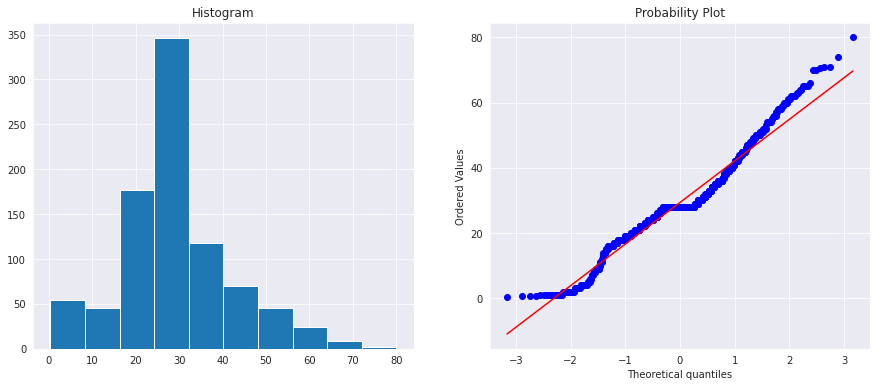

In [ ]:
qqplot(df,'Age')

##### Logarithmic Transformation

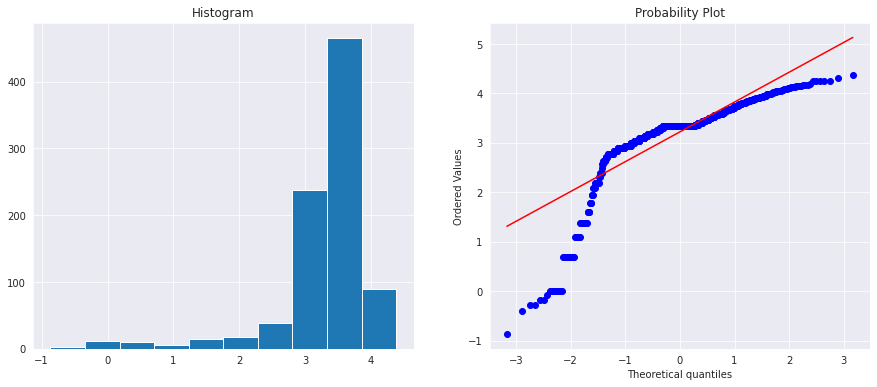

In [ ]:
df['Age_log'] = np.log(df['Age'])
qqplot(df,'Age_log')

##### Reciprocal Transformation

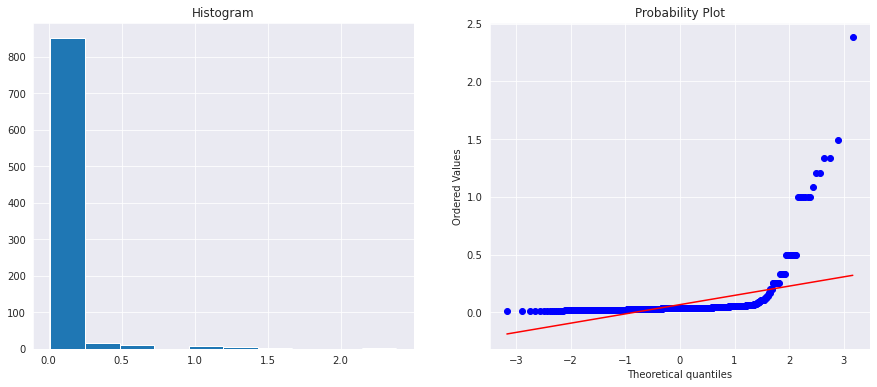

In [ ]:
df['Age_reciprocal'] = 1/df.Age
qqplot(df,'Age_reciprocal')

##### Square Root Transformation

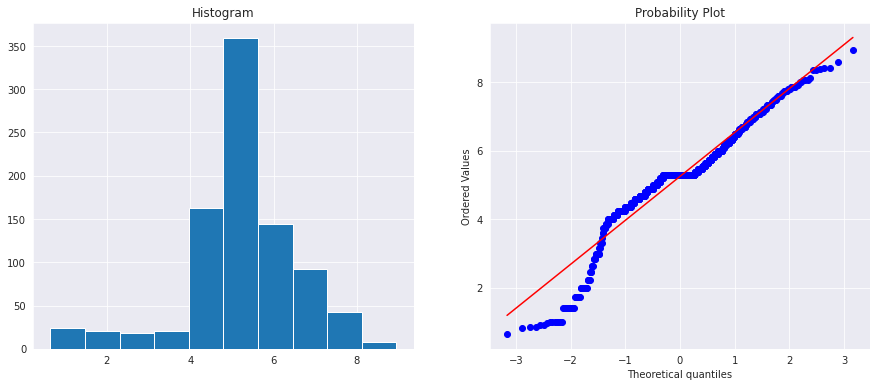

In [ ]:
df['Age_square'] = np.sqrt(df.Age)
qqplot(df,'Age_square')

######Exponential Transformation

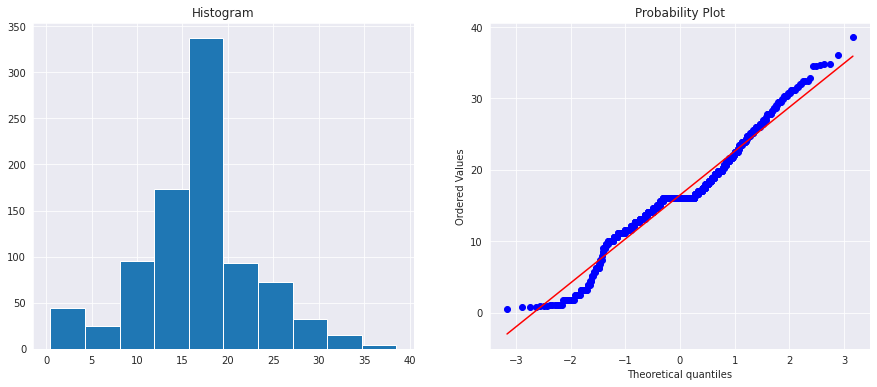

In [ ]:
df['Age_exponential'] = df['Age']**(1/1.2)
qqplot(df,'Age_exponential')

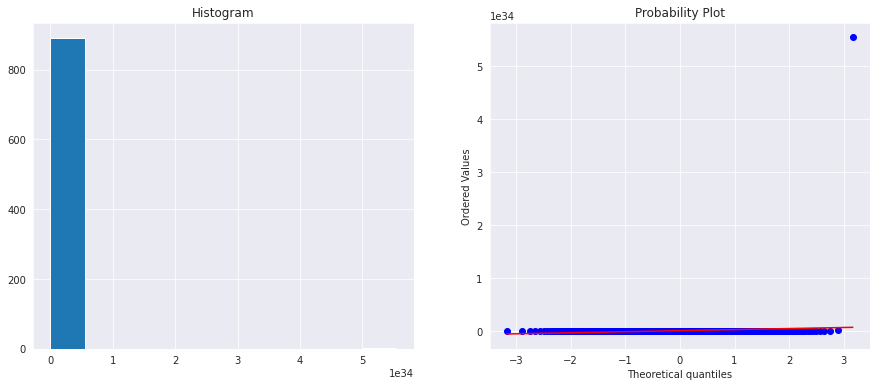

In [ ]:
df['Age_exponential'] = df['Age'].apply(np.exp)
qqplot(df,'Age_exponential')

#####Box Cox Transformation

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [16]:
df['Age_box_cox'],parameters = stat.boxcox(df['Age'])
print(parameters)

0.7964531473656952


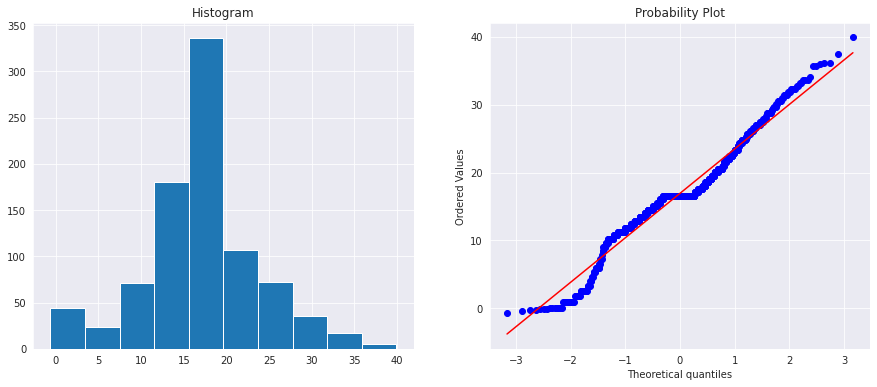

In [23]:
qqplot(df,'Age_box_cox')